In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
from zdrojaky.tsplot import tsplot

<AxesSubplot: ylabel='Level of internet access'>

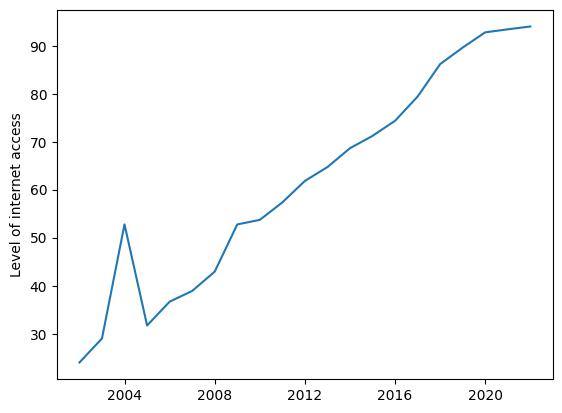

In [3]:
df = pd.read_csv('isoc_ci_in_h__custom_4517608_tabular.tsv', sep='\t')
df = df[df['freq,unit,hhtyp,geo\TIME_PERIOD'] == 'A,PC_HH,TOTAL,CY'].reset_index(drop=True)
df = df.drop(columns=['freq,unit,hhtyp,geo\TIME_PERIOD']).T
df.index = pd.to_datetime(df.index)
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)
df = df.rename(columns={0: 'Level of internet access'})
ts = df['Level of internet access'].astype(float)
sns.lineplot(ts)

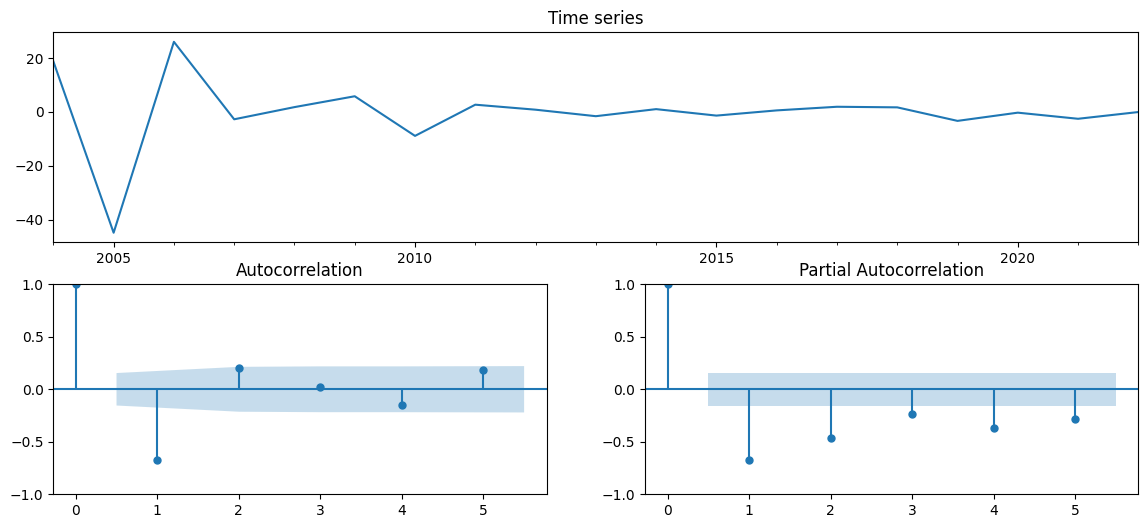

In [4]:
ts_d1 = ts.diff().dropna()
tsplot(ts_d1.diff().dropna(), lags=5)

Try differencing and exponential smoothing.

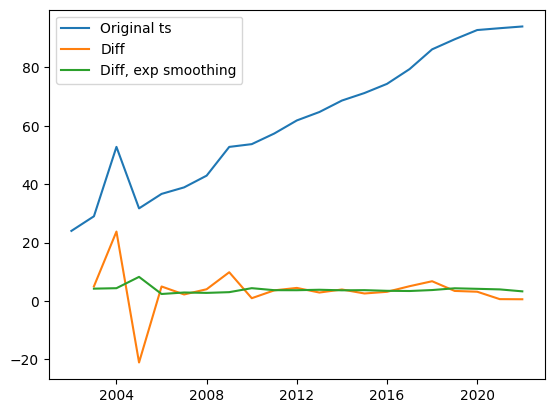

In [177]:
plt.plot(ts, label='Original ts')
plt.plot(ts_d1, label='Diff')
fit1 = SimpleExpSmoothing(ts_d1, initialization_method='heuristic').fit(smoothing_level=0.2)
fcast1 = fit1.forecast(5)
ts1 = fit1.fittedvalues
plt.plot(ts1, label='Diff, exp smoothing')
plt.legend()

Since y-axis is in percents, Holt exponential smoothing with dumped trend is well-suited.

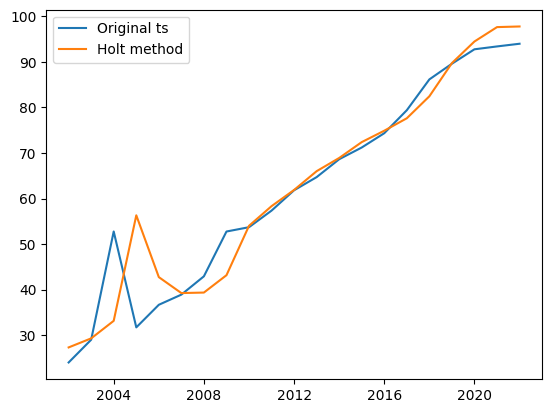

In [93]:
fit = ExponentialSmoothing(ts, trend='add').fit(smoothing_level=0.65, smoothing_trend=0.5, damping_trend=0.5)
plt.plot(ts, label='Original ts')
plt.plot(fit.fittedvalues, label='Holt method')
plt.legend()
plt.show()